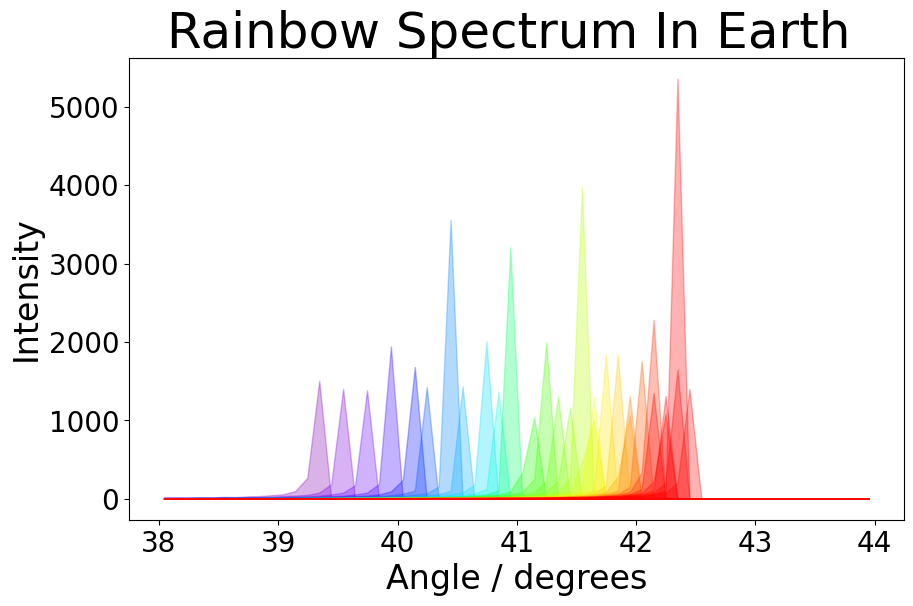

In [138]:
import numpy as np
import matplotlib.pyplot as plt

def wave2rgb(wave):
    # This is a port of javascript code from  http://stackoverflow.com/a/14917481
    gamma = 0.8
    intensity_max = 1

    if wave < 380:
        red, green, blue = 0, 0, 0
    elif wave < 440:
        red = -(wave - 440) / (440 - 380)
        green, blue = 0, 1
    elif wave < 490:
        red = 0
        green = (wave - 440) / (490 - 440)
        blue = 1
    elif wave < 510:
        red, green = 0, 1
        blue = -(wave - 510) / (510 - 490)
    elif wave < 580:
        red = (wave - 510) / (580 - 510)
        green, blue = 1, 0
    elif wave < 645:
        red = 1
        green = -(wave - 645) / (645 - 580)
        blue = 0
    elif wave <= 780:
        red, green, blue = 1, 0, 0
    else:
        red, green, blue = 0, 0, 0

    # let the intensity fall of near the vision limits
    if wave < 380:
        factor = 0
    elif wave < 420:
        factor = 0.3 + 0.7 * (wave - 380) / (420 - 380)
    elif wave < 700:
        factor = 1
    elif wave <= 780:
        factor = 0.3 + 0.7 * (780 - wave) / (780 - 700)
    else:
        factor = 0

    def f(c):
        if c == 0:
            return 0
        else:
            return intensity_max * pow (c * factor, gamma)

    return f(red), f(green), f(blue)


# 셀마이어 방정식을 사용한 물의 굴절률 계산 함수
def refractive_index(wavelength):
#     A = 0.5676
#     B = 0.00598
    wavelength_um = wavelength / 1000  # nm를 µm로 변환
#     n = np.sqrt(1 + (A * wavelength_um**2) / (wavelength_um**2 - B))
    A = 1.32
    B = 5207
    n = A + B/wavelength**2
    # file:///Users/minjoon/Downloads/Bashkatov_SPIE_03_5068_393.pdf
    return n


# 파장 범위 (빨간색에서 보라색까지, 700nm에서 400nm)
wavelengths = np.linspace(400, 700, 30)  # nm


# 무지개의 각도와 강도 계산

colors = ['violet', 'blue', 'green', 'yellow', 'red']

plt.figure(figsize=(10, 6))

angle_split = 900

for i,wavelength in enumerate(wavelengths):
    x= np.linspace(0, 1, 1000)

    n = refractive_index(wavelength)

    D = np.pi - (4*np.arcsin(x/n)-2*np.arcsin(x))

    # dD_dx = 2*(np.sqrt(1-x**2) - 2*np.sqrt(n**2 - x**2))/np.sqrt((1-x**2)*(n**2 - x**2))
    dD_dx = np.gradient(D,x)

    I_x = np.abs(x/np.sin(D)/dD_dx)

    I = np.zeros(angle_split)

    angles = np.linspace(0, 90, angle_split)

    for j in range(len(x)):
        I[(np.degrees(4*np.arcsin(x/n)-2*np.arcsin(x))*angle_split/90).astype(int)[j]] += I_x[j]


# I[(np.degrees(4*np.arcsin(x/n)-2*np.arcsin(x))).astype('int')] += I_x[x]

#     plt.plot(angles[500:700], I[500:700], color=colors[i])

#     plt.plot(angles[500:700], I[500:700], color=wave2rgb(wavelength))
    plt.fill_between(angles[380:440], 0,I[380:440], color=wave2rgb(wavelength), alpha=.3)

    # intensity가 커지면 커질 수록 더 찐하게 alpha 조절 (나중에 시간 나면)
plt.rcParams.update({'font.size': 20})
plt.xlabel('Angle / degrees', fontsize=24)
plt.ylabel('Intensity', fontsize=24)
plt.title('Rainbow Spectrum In Earth ', fontsize=36)
plt.savefig('foo.png', transparent=True)
# plt.plot(x, I_x)
plt.show()


In [ ]:
(np.degrees(4*np.arcsin(x/n)-2*np.arcsin(x))).astype(int)[40]

2

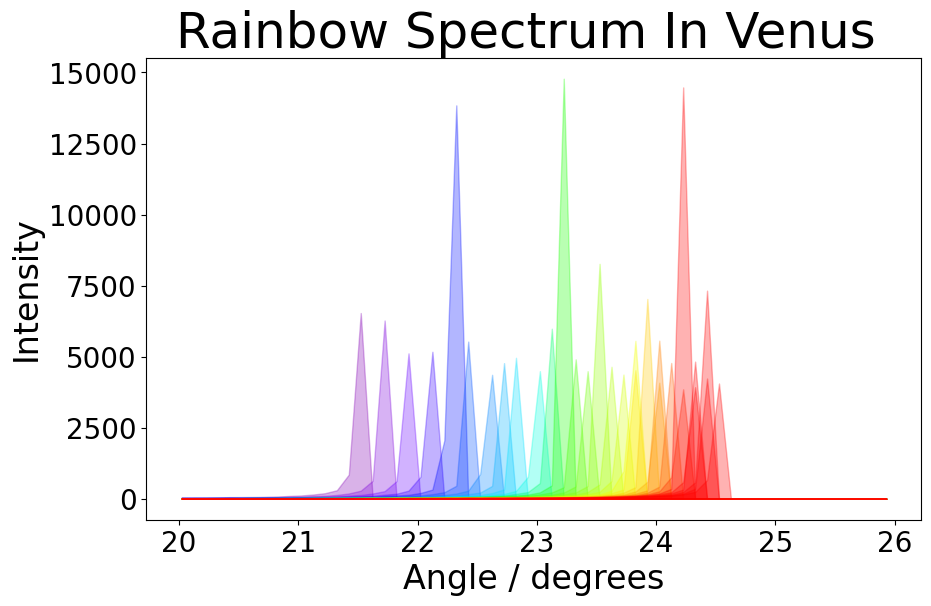

In [137]:
import numpy as np
import matplotlib.pyplot as plt


def wave2rgb(wave):
    # This is a port of javascript code from  http://stackoverflow.com/a/14917481
    gamma = 0.8
    intensity_max = 1

    if wave < 380:
        red, green, blue = 0, 0, 0
    elif wave < 440:
        red = -(wave - 440) / (440 - 380)
        green, blue = 0, 1
    elif wave < 490:
        red = 0
        green = (wave - 440) / (490 - 440)
        blue = 1
    elif wave < 510:
        red, green = 0, 1
        blue = -(wave - 510) / (510 - 490)
    elif wave < 580:
        red = (wave - 510) / (580 - 510)
        green, blue = 1, 0
    elif wave < 645:
        red = 1
        green = -(wave - 645) / (645 - 580)
        blue = 0
    elif wave <= 780:
        red, green, blue = 1, 0, 0
    else:
        red, green, blue = 0, 0, 0

    # let the intensity fall of near the vision limits
    if wave < 380:
        factor = 0
    elif wave < 420:
        factor = 0.3 + 0.7 * (wave - 380) / (420 - 380)
    elif wave < 700:
        factor = 1
    elif wave <= 780:
        factor = 0.3 + 0.7 * (780 - wave) / (780 - 700)
    else:
        factor = 0

    def f(c):
        if c == 0:
            return 0
        else:
            return intensity_max * pow (c * factor, gamma)

    return f(red), f(green), f(blue)


# 셀마이어 방정식을 사용한 물의 굴절률 계산 함수
def refractive_index(wavelength):
    wavelength_um = wavelength / 1000  # nm를 µm로 변환
    R = 9.342 + 1.32e-1/(wavelength_um**2)
    p = 1.9
    M = 64.074
    n_squared = 3/(1-R*p/M)-2

    return np.sqrt(n_squared)

# 파장 범위 (빨간색에서 보라색까지, 700nm에서 400nm)
wavelengths = np.linspace(400, 700, 30)  # nm


# 무지개의 각도와 강도 계산

colors = ['violet', 'blue', 'green', 'yellow', 'red']

plt.figure(figsize=(10, 6))


for i,wavelength in enumerate(wavelengths):
    x= np.linspace(0, 1, 1000)

    n = refractive_index(wavelength)


    D = np.pi - (4*np.arcsin(x/n)-2*np.arcsin(x))

    # dD_dx = 2*(np.sqrt(1-x**2) - 2*np.sqrt(n**2 - x**2))/np.sqrt((1-x**2)*(n**2 - x**2))
    dD_dx = np.gradient(D,x)

    I_x = np.abs(x/np.sin(D)/dD_dx)

    I = np.zeros(900)

    angles = np.linspace(0, 90, 900)

    for j in range(len(x)):
        # if np.degrees(4*np.arcsin(x/n)-2*np.arcsin(x))[j] <90:

        I[(np.degrees(4*np.arcsin(x/n)-2*np.arcsin(x))*10).astype(int)[j]] += I_x[j]

    plt.fill_between(angles[200:260], 0,I[200:260], color=wave2rgb(wavelength), alpha=.3)
# I[(np.degrees(4*np.arcsin(x/n)-2*np.arcsin(x))).astype('int')] += I_x[x]

#     plt.plot(angles[500:700], I[500:700], color=colors[i])


#     plt.fill_between(angles, 0,I, color=wave2rgb(wavelength), alpha=.3)

    # intensity가 커지면 커질 수록 더 찐하게 alpha 조절 (나중에 시간 나면)

plt.rcParams.update({'font.size': 20})
# plt.plot(x, I_x)
plt.xlabel('Angle / degrees', fontsize=24)
plt.ylabel('Intensity', fontsize=24)
plt.title('Rainbow Spectrum In Venus ', fontsize=36)
plt.savefig('foo.png', transparent=True)

plt.show()

In [29]:
I.shape

(900,)

In [ ]:
import numpy as np

# 셀마이어 계수
A = 5.220e21
B = 8.178e21

# 파장 (µm 단위)
wavelength = 0.55

# 굴절률 계산
n_squared = 1 + (A * wavelength**2) / (B - wavelength**2)
n = np.sqrt(n_squared)

n


1.0922843523474

In [ ]:
5.220e27/(8178e27-0.55**2)

0.0006382978723404255

In [14]:
R = 9.342 + 1.32e-9/(0.55**2*1e-8)

In [22]:
p = 1.9
M = 64.074
n_squared = 3/(1-R*p/M)-2
np.sqrt(n_squared)

1.4916814367366886

In [15]:
R

9.778363636363636

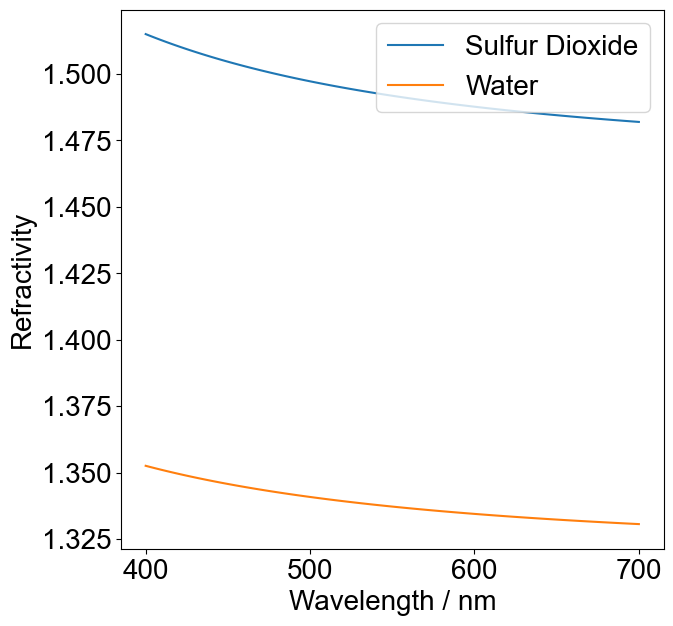

In [51]:
import numpy as np
import matplotlib.pyplot as plt

def refractive_index_earth(wavelength):
#     A = 0.5676
#     B = 0.00598
    wavelength_um = wavelength / 1000  # nm를 µm로 변환
#     n = np.sqrt(1 + (A * wavelength_um**2) / (wavelength_um**2 - B))
    A = 1.32
    B = 5207
    n = A + B/wavelength**2
    # file:///Users/minjoon/Downloads/Bashkatov_SPIE_03_5068_393.pdf
    return n


def refractive_index_venus(wavelength):
    wavelength_um = wavelength / 1000  # nm를 µm로 변환
    R = 9.342 + 1.32e-1/(wavelength_um**2)
    p = 1.9
    M = 64.074
    n_squared = 3/(1-R*p/M)-2

    return np.sqrt(n_squared)

plt.rcParams['font.family'] ='Arial'
plt.rcParams['axes.unicode_minus'] =False

plt.figure(figsize=(7, 7))

wavelength = np.linspace(400, 700, 100)
plt.plot(wavelength, refractive_index_venus(wavelength), label="Sulfur Dioxide")
# plt.plot(wavelength, refractive_index_earth(wavelength), label="Water")

plt.rcParams.update({'font.size': 20})
plt.xlabel('Wavelength / nm', fontsize=20)
plt.ylabel('Refractivity', fontsize=20)
# plt.title('Refractive Index of Sulfur Dioxide', fontsize=40)
plt.legend(loc="upper right")
# plt.ylim(1.3, 1.57)
params = {'legend.fontsize': 'x-large'}
plt.grid()


# plt.show()


wavelength = np.linspace(400, 700, 100)
# plt.plot(wavelength, refractive_index_venus(wavelength), label="Sulfur Dioxide")
plt.plot(wavelength, refractive_index_earth(wavelength), label="Water")

plt.rcParams.update({'font.size': 20})
plt.xlabel('Wavelength / nm', fontsize=20)
plt.ylabel('Refractivity', fontsize=20)
# plt.title('Refractive Index of Water', fontsize=40)
plt.legend(loc="upper right")
# plt.ylim(1.3, 1.57)
params = {'legend.fontsize': 'x-large'}
plt.grid()


plt.show()

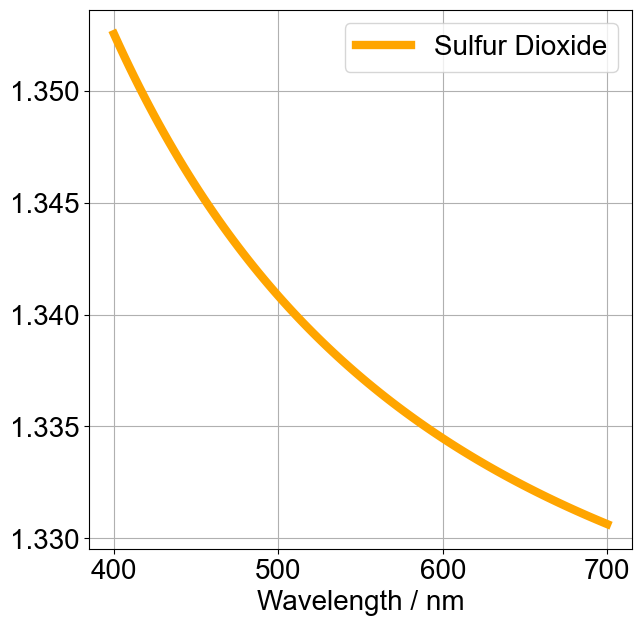

In [66]:
plt.rcParams['font.family'] ='Arial'
plt.rcParams['axes.unicode_minus'] =False

plt.figure(figsize=(7, 7))

wavelength = np.linspace(400, 700, 100)
plt.plot(wavelength, refractive_index_earth(wavelength), label="Sulfur Dioxide", color="orange", linewidth=6)
# plt.plot(wavelength, refractive_index_earth(wavelength), label="Water")

plt.rcParams.update({'font.size': 20})
plt.xlabel('Wavelength / nm', fontsize=20)
# plt.ylabel('Refractivity', fontsize=20)
# plt.title('Refractive Index of Sulfur Dioxide', fontsize=40)
plt.legend(loc="upper right")
# plt.ylim(1.3, 1.57)
params = {'legend.fontsize': 'x-large'}
plt.grid()

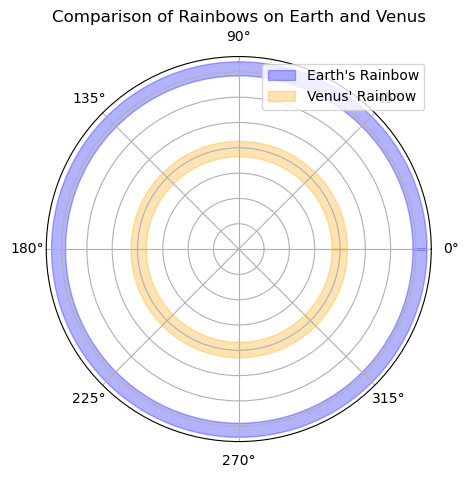

In [35]:
import matplotlib.pyplot as plt
import numpy as np

# Define the radius range for Earth's rainbow and Venus' rainbow
earth_min_radius = 39.3  # degrees
earth_max_radius = 42.5  # degrees
venus_min_radius = 21  # degrees
venus_max_radius = 24.5  # degrees

# Create a polar plot for the rainbows
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'}, figsize=(10, 5))

# Earth rainbow
earth_theta = np.linspace(0, 2 * np.pi, 1000)
earth_min_r = np.full_like(earth_theta, np.deg2rad(earth_min_radius))
earth_max_r = np.full_like(earth_theta, np.deg2rad(earth_max_radius))
ax.fill_between(earth_theta, earth_min_r, earth_max_r, color='blue', alpha=0.3, label='Earth\'s Rainbow')

# Venus rainbow
venus_theta = np.linspace(0, 2 * np.pi, 1000)
venus_min_r = np.full_like(venus_theta, np.deg2rad(venus_min_radius))
venus_max_r = np.full_like(venus_theta, np.deg2rad(venus_max_radius))
ax.fill_between(venus_theta, venus_min_r, venus_max_r, color='orange', alpha=0.3, label='Venus\' Rainbow')

# Set labels and legend
ax.set_title('Comparison of Rainbows on Earth and Venus')
ax.set_yticklabels([])
ax.legend(loc='upper right')

plt.show()

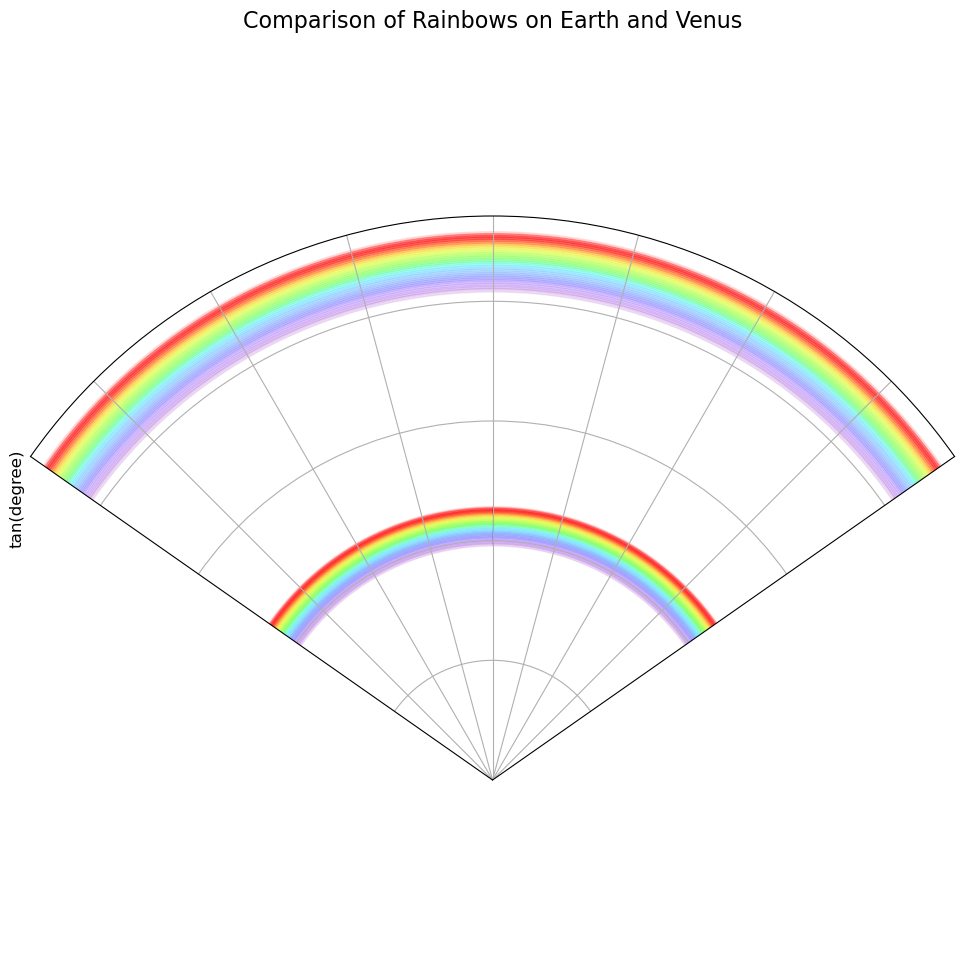

In [106]:
import numpy as np
import matplotlib.pyplot as plt

def wave2rgb(wave):
    # This is a port of javascript code from  http://stackoverflow.com/a/14917481
    gamma = 0.8
    intensity_max = 1

    if wave < 380:
        red, green, blue = 0, 0, 0
    elif wave < 440:
        red = -(wave - 440) / (440 - 380)
        green, blue = 0, 1
    elif wave < 490:
        red = 0
        green = (wave - 440) / (490 - 440)
        blue = 1
    elif wave < 510:
        red, green = 0, 1
        blue = -(wave - 510) / (510 - 490)
    elif wave < 580:
        red = (wave - 510) / (580 - 510)
        green, blue = 1, 0
    elif wave < 645:
        red = 1
        green = -(wave - 645) / (645 - 580)
        blue = 0
    elif wave <= 780:
        red, green, blue = 1, 0, 0
    else:
        red, green, blue = 0, 0, 0

    # let the intensity fall of near the vision limits
    if wave < 380:
        factor = 0
    elif wave < 420:
        factor = 0.3 + 0.7 * (wave - 380) / (420 - 380)
    elif wave < 700:
        factor = 1
    elif wave <= 780:
        factor = 0.3 + 0.7 * (780 - wave) / (780 - 700)
    else:
        factor = 0

    def f(c):
        if c == 0:
            return 0
        else:
            return intensity_max * pow (c * factor, gamma)

    return f(red), f(green), f(blue)


# 셀마이어 방정식을 사용한 물의 굴절률 계산 함수
def refractive_index(wavelength):
#     A = 0.5676
#     B = 0.00598
    wavelength_um = wavelength / 1000  # nm를 µm로 변환
#     n = np.sqrt(1 + (A * wavelength_um**2) / (wavelength_um**2 - B))
    A = 1.32
    B = 5207
    n = A + B/wavelength**2
    # file:///Users/minjoon/Downloads/Bashkatov_SPIE_03_5068_393.pdf
    return n


# 파장 범위 (빨간색에서 보라색까지, 700nm에서 400nm)
wavelengths = np.linspace(400, 700, 100)  # nm


fig, ax = plt.subplots(subplot_kw={'projection': 'polar'}, figsize=(20, 12))

angle_split = 900

earth_theta = np.linspace(0, np.pi, 1000)

for i,wavelength in enumerate(wavelengths):
    x= np.linspace(0, 1, 1000)

    n = refractive_index(wavelength)

    D = np.pi - (4*np.arcsin(x/n)-2*np.arcsin(x))

    # dD_dx = 2*(np.sqrt(1-x**2) - 2*np.sqrt(n**2 - x**2))/np.sqrt((1-x**2)*(n**2 - x**2))
    dD_dx = np.gradient(D,x)

    I_x = np.abs(x/np.sin(D)/dD_dx)

    I = np.zeros(angle_split)

    angles = np.linspace(0, 90, angle_split)

    for j in range(len(x)):
        I[(np.degrees(4*np.arcsin(x/n)-2*np.arcsin(x))*angle_split/90).astype(int)[j]] += I_x[j]

    
#     plt.fill_between(angles[380:460], 0,I[380:460], color=wave2rgb(wavelength), alpha=.3)
#     earth_min_r = np.full_like(earth_theta, np.tan(np.deg2rad(min(np.array(range(angle_split))[I>150*np.mean(I)])/10)))
#     earth_max_r = np.full_like(earth_theta, np.tan(np.deg2rad(max(np.array(range(angle_split))[I>150*np.mean(I)])/10)))

    earth_min_r = np.full_like(earth_theta, np.tan(np.deg2rad(np.argmax(I)/10-0.1)))
    earth_max_r = np.full_like(earth_theta, np.tan(np.deg2rad(np.argmax(I)/10+0.1)))
    plt.fill_between(earth_theta, earth_min_r, earth_max_r, color=wave2rgb(wavelength), alpha=0.05)


# 셀마이어 방정식을 사용한 물의 굴절률 계산 함수
def refractive_index(wavelength):
    wavelength_um = wavelength / 1000  # nm를 µm로 변환
    R = 9.342 + 1.32e-1/(wavelength_um**2)
    p = 1.9
    M = 64.074
    n_squared = 3/(1-R*p/M)-2

    return np.sqrt(n_squared)

# 파장 범위 (빨간색에서 보라색까지, 700nm에서 400nm)
wavelengths = np.linspace(400, 700, 100)  # nm


# 무지개의 각도와 강도 계산

# venus_theta = np.linspace(np.pi,2*np.pi, 1000)
venus_theta = earth_theta


for i,wavelength in enumerate(wavelengths):
    x= np.linspace(0, 1, 1000)

    n = refractive_index(wavelength)


    D = np.pi - (4*np.arcsin(x/n)-2*np.arcsin(x))

    # dD_dx = 2*(np.sqrt(1-x**2) - 2*np.sqrt(n**2 - x**2))/np.sqrt((1-x**2)*(n**2 - x**2))
    dD_dx = np.gradient(D,x)

    I_x = np.abs(x/np.sin(D)/dD_dx)

    I = np.zeros(900)

    angles = np.linspace(0, 90, 900)

    for j in range(len(x)):
        # if np.degrees(4*np.arcsin(x/n)-2*np.arcsin(x))[j] <90:

        I[(np.degrees(4*np.arcsin(x/n)-2*np.arcsin(x))*10).astype(int)[j]] += I_x[j]

#     plt.fill_between(angles[180:300], 0,I[180:300], color=wave2rgb(wavelength), alpha=.3)
#     venus_min_r = np.full_like(venus_theta, np.tan(np.deg2rad(min(np.array(range(angle_split))[I>200*np.mean(I)])/10)))
#     venus_max_r = np.full_like(venus_theta, np.tan(np.deg2rad(max(np.array(range(angle_split))[I>200*np.mean(I)])/10)))
    venus_min_r = np.full_like(venus_theta, np.tan(np.deg2rad(np.argmax(I)/10-0.1)))
    venus_max_r = np.full_like(venus_theta, np.tan(np.deg2rad(np.argmax(I)/10+0.1)))
    plt.fill_between(venus_theta, venus_min_r, venus_max_r, color=wave2rgb(wavelength), alpha=0.05)



# Set labels and legend
# ax.set_title('Comparison of Rainbows on Earth and Venus')
ax.set_yticklabels([])
ax.set_xticklabels([])
# ax.legend(loc='upper right')
# ax.set_theta_direction(-1)
ax.set_thetamin(35)
ax.set_thetamax(145)
# ax.set_theta_zero_location('N')

plt.ylabel('tan(degree)', fontsize=12)
plt.title('Comparison of Rainbows on Earth and Venus', fontsize=16)

plt.savefig('foo.png', transparent=True)
plt.show()
